In [101]:
import requests
import json 

In [102]:
from dotenv import dotenv_values

In [103]:
import pandas as pd

In [104]:
#Will need to deal with this with Heroku's config vars for deployment
config = dotenv_values('.env')
key = config['ALPHA_API_KEY']

In [105]:
ticker = 'FB' 

In [106]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&apikey={}'.format(ticker, key)

In [107]:
response = requests.get(url)

In [108]:
response_data = response.json() 

In [109]:
len(response_data)

2

In [110]:
response_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [111]:
response_data['Meta Data']

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'FB',
 '3. Last Refreshed': '2021-09-17',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [112]:
len(response_data['Meta Data'])

5

In [113]:
len(response_data['Time Series (Daily)'])

100

In [114]:
print(response_data)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'FB', '3. Last Refreshed': '2021-09-17', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2021-09-17': {'1. open': '371.405', '2. high': '371.41', '3. low': '361.59', '4. close': '364.72', '5. adjusted close': '364.72', '6. volume': '26298966', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2021-09-16': {'1. open': '372.79', '2. high': '373.56', '3. low': '369.71', '4. close': '373.06', '5. adjusted close': '373.06', '6. volume': '11934217', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2021-09-15': {'1. open': '377.0', '2. high': '377.555', '3. low': '367.67', '4. close': '373.92', '5. adjusted close': '373.92', '6. volume': '17940297', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2021-09-14': {'1. open': '377.4', '2. high': '378.59', '3. low': '375.11', '4. close': '376.53', '5. adjusted close':

In [115]:
ticker_df = pd.DataFrame.from_dict(response_data['Time Series (Daily)'],orient='index',dtype='float')

In [116]:
ticker_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-09-17,371.405,371.410,361.5900,364.72,364.72,26298966.0,0.0,1.0
2021-09-16,372.790,373.560,369.7100,373.06,373.06,11934217.0,0.0,1.0
2021-09-15,377.000,377.555,367.6700,373.92,373.92,17940297.0,0.0,1.0
2021-09-14,377.400,378.590,375.1100,376.53,376.53,8711569.0,0.0,1.0
2021-09-13,381.680,381.750,374.3451,376.51,376.51,13026275.0,0.0,1.0


In [117]:
ticker_df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [118]:
ticker_df.index

Index(['2021-09-17', '2021-09-16', '2021-09-15', '2021-09-14', '2021-09-13',
       '2021-09-10', '2021-09-09', '2021-09-08', '2021-09-07', '2021-09-03',
       '2021-09-02', '2021-09-01', '2021-08-31', '2021-08-30', '2021-08-27',
       '2021-08-26', '2021-08-25', '2021-08-24', '2021-08-23', '2021-08-20',
       '2021-08-19', '2021-08-18', '2021-08-17', '2021-08-16', '2021-08-13',
       '2021-08-12', '2021-08-11', '2021-08-10', '2021-08-09', '2021-08-06',
       '2021-08-05', '2021-08-04', '2021-08-03', '2021-08-02', '2021-07-30',
       '2021-07-29', '2021-07-28', '2021-07-27', '2021-07-26', '2021-07-23',
       '2021-07-22', '2021-07-21', '2021-07-20', '2021-07-19', '2021-07-16',
       '2021-07-15', '2021-07-14', '2021-07-13', '2021-07-12', '2021-07-09',
       '2021-07-08', '2021-07-07', '2021-07-06', '2021-07-02', '2021-07-01',
       '2021-06-30', '2021-06-29', '2021-06-28', '2021-06-25', '2021-06-24',
       '2021-06-23', '2021-06-22', '2021-06-21', '2021-06-18', '2021-06-17',

In [119]:
#switch to increasing chronological order and to datetime format
ticker_df = ticker_df.iloc[::-1]

In [120]:
ticker_df.index = pd.to_datetime(ticker_df.index)

In [121]:
#try a different ticker
ticker_new = 'AAPL'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&apikey={}'.format(ticker_new, key)
response_new = requests.get(url)
response_data_new = response_new.json() 

In [122]:
len(response_data_new)

2

In [123]:
len(response_data_new['Meta Data'])

5

In [124]:
len(response_data_new['Time Series (Daily)'])

100

In [125]:
response_data_new['Meta Data']

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2021-09-17',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [126]:
response_data_new['Time Series (Daily)']['2021-09-14']

{'1. open': '150.35',
 '2. high': '151.07',
 '3. low': '146.91',
 '4. close': '148.12',
 '5. adjusted close': '148.12',
 '6. volume': '109296295',
 '7. dividend amount': '0.0000',
 '8. split coefficient': '1.0'}

In [127]:
ticker_df_new = pd.DataFrame.from_dict(response_data_new['Time Series (Daily)'],orient='index',dtype='float')

In [128]:
ticker_df_new.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-09-17,148.82,148.82,145.760,146.06,146.06,129868824.0,0.0,1.0
2021-09-16,148.44,148.97,147.221,148.79,148.79,68034149.0,0.0,1.0
2021-09-15,148.56,149.44,146.370,149.03,149.03,83281315.0,0.0,1.0
2021-09-14,150.35,151.07,146.910,148.12,148.12,109296295.0,0.0,1.0
2021-09-13,150.63,151.42,148.750,149.55,149.55,102404329.0,0.0,1.0


In [129]:
ticker_df_new.index

Index(['2021-09-17', '2021-09-16', '2021-09-15', '2021-09-14', '2021-09-13',
       '2021-09-10', '2021-09-09', '2021-09-08', '2021-09-07', '2021-09-03',
       '2021-09-02', '2021-09-01', '2021-08-31', '2021-08-30', '2021-08-27',
       '2021-08-26', '2021-08-25', '2021-08-24', '2021-08-23', '2021-08-20',
       '2021-08-19', '2021-08-18', '2021-08-17', '2021-08-16', '2021-08-13',
       '2021-08-12', '2021-08-11', '2021-08-10', '2021-08-09', '2021-08-06',
       '2021-08-05', '2021-08-04', '2021-08-03', '2021-08-02', '2021-07-30',
       '2021-07-29', '2021-07-28', '2021-07-27', '2021-07-26', '2021-07-23',
       '2021-07-22', '2021-07-21', '2021-07-20', '2021-07-19', '2021-07-16',
       '2021-07-15', '2021-07-14', '2021-07-13', '2021-07-12', '2021-07-09',
       '2021-07-08', '2021-07-07', '2021-07-06', '2021-07-02', '2021-07-01',
       '2021-06-30', '2021-06-29', '2021-06-28', '2021-06-25', '2021-06-24',
       '2021-06-23', '2021-06-22', '2021-06-21', '2021-06-18', '2021-06-17',

In [130]:
#switch to increasing chronological order and to datetime format
ticker_df_new = ticker_df_new.iloc[::-1]

In [131]:
ticker_df_new.index = pd.to_datetime(ticker_df_new.index)

In [132]:
##Optional: specify the timezone
#ticker_df_new.index.tz_localize("US/Eastern")

In [133]:
#Try to concatenate the two dataframes:

In [134]:
ticker_df_new.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-04-28,134.31,135.0200,133.080,133.58,133.154236,107760097.0,0.0,1.0
2021-04-29,136.47,137.0700,132.450,133.48,133.054554,151100953.0,0.0,1.0
2021-04-30,131.78,133.5600,131.065,131.46,131.040993,109839466.0,0.0,1.0
2021-05-03,132.04,134.0700,131.830,132.54,132.117550,75135100.0,0.0,1.0
2021-05-04,131.19,131.4899,126.700,127.85,127.442499,137564718.0,0.0,1.0


In [135]:
ticker_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-04-28,307.3600,310.92,305.37,307.10,307.10,33907210.0,0.0,1.0
2021-04-29,330.1200,331.81,321.61,329.51,329.51,56526771.0,0.0,1.0
2021-04-30,326.1435,329.82,324.50,325.08,325.08,26332423.0,0.0,1.0
2021-05-03,326.1700,328.55,321.84,322.58,322.58,18719462.0,0.0,1.0
2021-05-04,320.0250,322.19,313.12,318.36,318.36,24032557.0,0.0,1.0


In [136]:
ticker_df_all = {}

In [137]:
ticker_df_all['FB']=ticker_df

In [138]:
ticker_df_all['AAPL']=ticker_df_new

In [139]:
ticker_df_all = pd.concat(ticker_df_all,axis=1)

In [140]:
ticker_df_all.head()

FB                                                         \
             1. open 2. high  3. low 4. close 5. adjusted close   6. volume   
2021-04-28  307.3600  310.92  305.37   307.10            307.10  33907210.0   
2021-04-29  330.1200  331.81  321.61   329.51            329.51  56526771.0   
2021-04-30  326.1435  329.82  324.50   325.08            325.08  26332423.0   
2021-05-03  326.1700  328.55  321.84   322.58            322.58  18719462.0   
2021-05-04  320.0250  322.19  313.12   318.36            318.36  24032557.0   

                                                      AAPL                     \
           7. dividend amount 8. split coefficient 1. open   2. high   3. low   
2021-04-28                0.0                  1.0  134.31  135.0200  133.080   
2021-04-29                0.0                  1.0  136.47  137.0700  132.450   
2021-04-30                0.0                  1.0  131.78  133.5600  131.065   
2021-05-03                0.0                  1.0  132.04  134.0700  131.830   
2021-05-04                0.0                  1.0  131.19  131.4899  126.700   

                                                                       \
           4. close 5. adjusted close    6. volume 7. dividend amount   
2021-04-28   133.58        133.154236  107760097.0                0.0   
2021-04-29   133.48        133.054554  151100953.0                0.0   
2021-04-30   131.46        131.040993  109839466.0                0.0   
2021-05-03   132.54        132.117550   75135100.0                0.0   
2021-05-04   127.85        127.442499  137564718.0                0.0   

                                 
           8. split coefficient  
2021-04-28                  1.0  
2021-04-29                  1.0  
2021-04-30                  1.0  
2021-05-03                  1.0  
2021-05-04                  1.0

In [141]:
ticker_df_all['FB','1. open']

2021-04-28    307.3600
2021-04-29    330.1200
2021-04-30    326.1435
2021-05-03    326.1700
2021-05-04    320.0250
                ...   
2021-09-13    381.6800
2021-09-14    377.4000
2021-09-15    377.0000
2021-09-16    372.7900
2021-09-17    371.4050
Name: (FB, 1. open), Length: 100, dtype: float64

In [142]:
#Create custom business day frequency based on Federal holidays in the US
from pandas.tseries.holiday import USFederalHolidayCalendar

bday_us = pd.offsets.CustomBusinessDay(calendar=USFederalHolidayCalendar())


In [144]:
check_dates = pd.date_range(start="20210428", end="20210917", freq=bday_us)
check_dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
      

In [145]:
ticker_df_all.index

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
      

In [146]:
check_dates == ticker_df_all.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [147]:
#So now I can officially specify that the data is sampled every business (US-based) day   
ticker_df_all.index.freq=bday_us

In [148]:
ticker_df_all.index

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
      

In [149]:
ticker_df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2021-04-28 to 2021-09-17
Freq: C
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (FB, 1. open)                 100 non-null    float64
 1   (FB, 2. high)                 100 non-null    float64
 2   (FB, 3. low)                  100 non-null    float64
 3   (FB, 4. close)                100 non-null    float64
 4   (FB, 5. adjusted close)       100 non-null    float64
 5   (FB, 6. volume)               100 non-null    float64
 6   (FB, 7. dividend amount)      100 non-null    float64
 7   (FB, 8. split coefficient)    100 non-null    float64
 8   (AAPL, 1. open)               100 non-null    float64
 9   (AAPL, 2. high)               100 non-null    float64
 10  (AAPL, 3. low)                100 non-null    float64
 11  (AAPL, 4. close)              100 non-null    float64
 12  (AAPL, 5. adjusted close)     100 non

In [151]:
ticker_df_all.loc['2021-05-19']

FB    1. open                 3.041850e+02
      2. high                 3.146600e+02
      3. low                  3.035700e+02
      4. close                3.135900e+02
      5. adjusted close       3.135900e+02
      6. volume               1.910624e+07
      7. dividend amount      0.000000e+00
      8. split coefficient    1.000000e+00
AAPL  1. open                 1.231600e+02
      2. high                 1.249150e+02
      3. low                  1.228600e+02
      4. close                1.246900e+02
      5. adjusted close       1.245026e+02
      6. volume               9.261199e+07
      7. dividend amount      0.000000e+00
      8. split coefficient    1.000000e+00
Name: 2021-05-19 00:00:00, dtype: float64

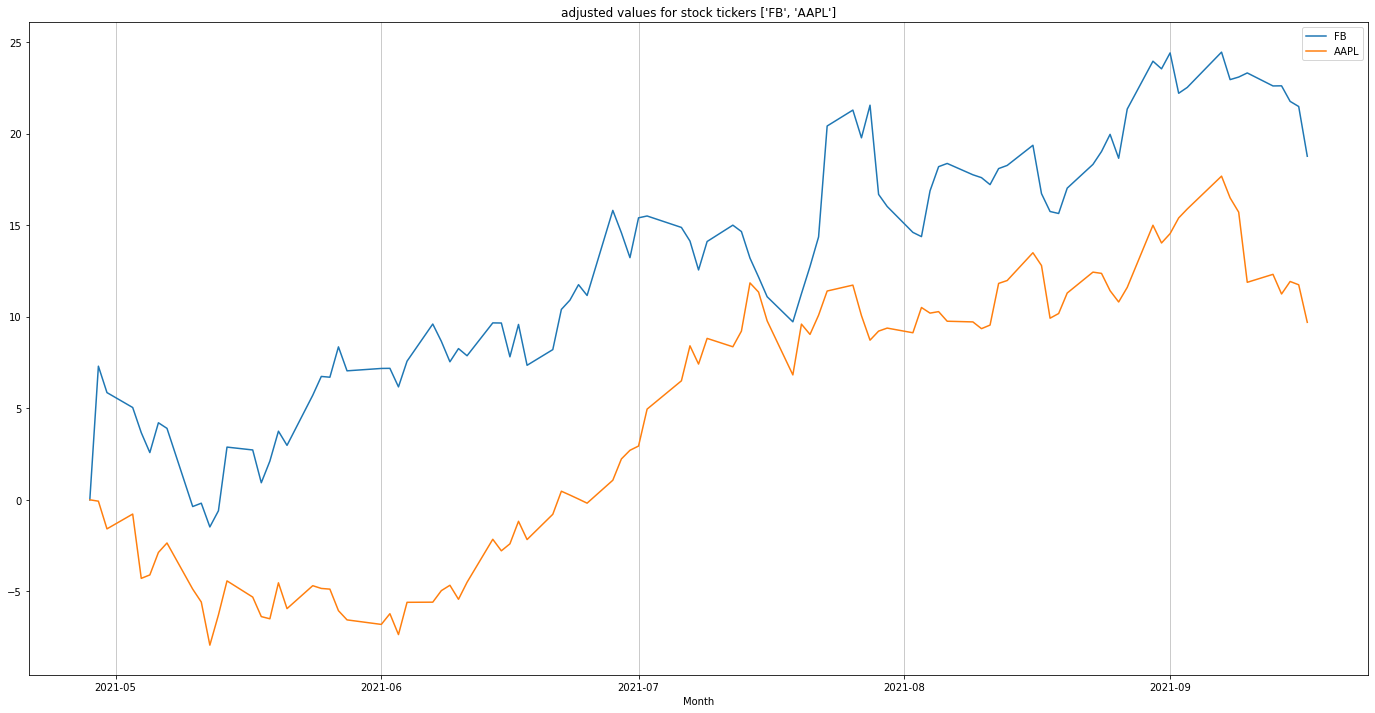

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=[24,12])

var_to_show = '5. adjusted close' #'4. close' #'1. open' #'5. adjusted close'

tickers_all = ['FB','AAPL']

for ticker in tickers_all:
    series_to_show = ticker_df_all[ticker,var_to_show] 

    #normalization
    series_to_show = 100*(series_to_show - series_to_show[0])/series_to_show[0]

    plt.plot(series_to_show, label=ticker)
    
plt.xlabel('Month')
plt.grid(axis='x', color='0.75')
plt.legend()

plt.title('{} values for stock tickers {}'.format(var_to_show.split()[1],tickers_all),y=1.00);


In [166]:
#Let's try with Bokeh instead

from bokeh.plotting import figure, show
from bokeh.io import output_notebook 

output_notebook()

var_to_show = '5. adjusted close' #'4. close' #'1. open' #'5. adjusted close'

tickers_all = ['FB','AAPL']

#optional figure arguments:
kw = dict()
#kw['tools'] = 'pan,box_zoom,hover,reset'
kw['title'] = 'Stock performance from Alpha Vantage API'

colors_list = {'AAPL':'black','GOOG':'red','MSFT':'green','FB':'blue','PFE':'orange','MRNA':'pink','JNJ':'purple','AZN':'grey'}

p = figure(width=500, height=300, x_axis_type="datetime",**kw) 
p.yaxis.axis_label = var_to_show + ' - Percentage Change' 

for ticker in tickers_all:
    series_to_show = ticker_df_all[ticker,var_to_show] 

    #normalization
    series_to_show = 100*(series_to_show - series_to_show[0])/series_to_show[0]

    # add a line renderer
    p.line(x = ticker_df_all.index, y=series_to_show, line_width=2, legend_label = ticker, color=colors_list[ticker])
    #p.line(ticker_df.index, ticker_df['5. adjusted close'], line_width=2)

p.legend.location = 'top_left'

p.legend.title = 'Stock'
p.legend.title_text_font_style = "bold"
p.legend.title_text_font_size = "15px"

kw['title'] = 'Stocks performance from Alpha Vantage API'

show(p)



Loading BokehJS ...